# Heart Disease Classifier using ANN

In this project, we will be predicting whether a person has heart disease or not through Artificial Neural Network from Deep Learning

First of all, attach the heart disease dataset in this project directory.

## Data Description

Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

__About Dataset:__

*Context*

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

*Content*

**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

*The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.*

## Data Loading

This is where we will load the dataset, and conduct data exploration and analysis

We will need pandas library to do this

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


__Describing Data__

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape

(1025, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


__Exploring Data Label__

In [9]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

__Checking Null Values__

In [10]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## Data Visualization

Let's now visualize our dataset to better interpret it.

We need to import these libraries first.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

We can set the desired graph styles for matplotlib and seaborn.

In [50]:
plt.style.use('seaborn')

In [51]:
sns.set(rc={"figure.facecolor" : "white"})

### Bar Graph

Firstly, we need to check whether our dataset is balanced or not. We can do this using countplot.

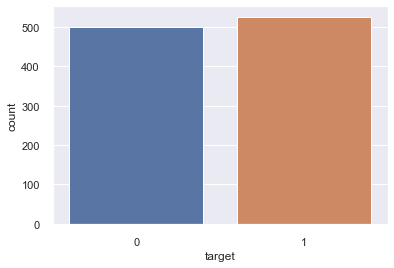

In [14]:
sns.countplot(x=df["target"])
plt.show()

Dataset is very balanced.

### Histogram

Next, we can analyze the distribution of every numerical feature/column in our dataset. We can do this using histogram.

First of all, we can drop the **target** column.

In [15]:
df_dist = df.drop("target", axis=1)

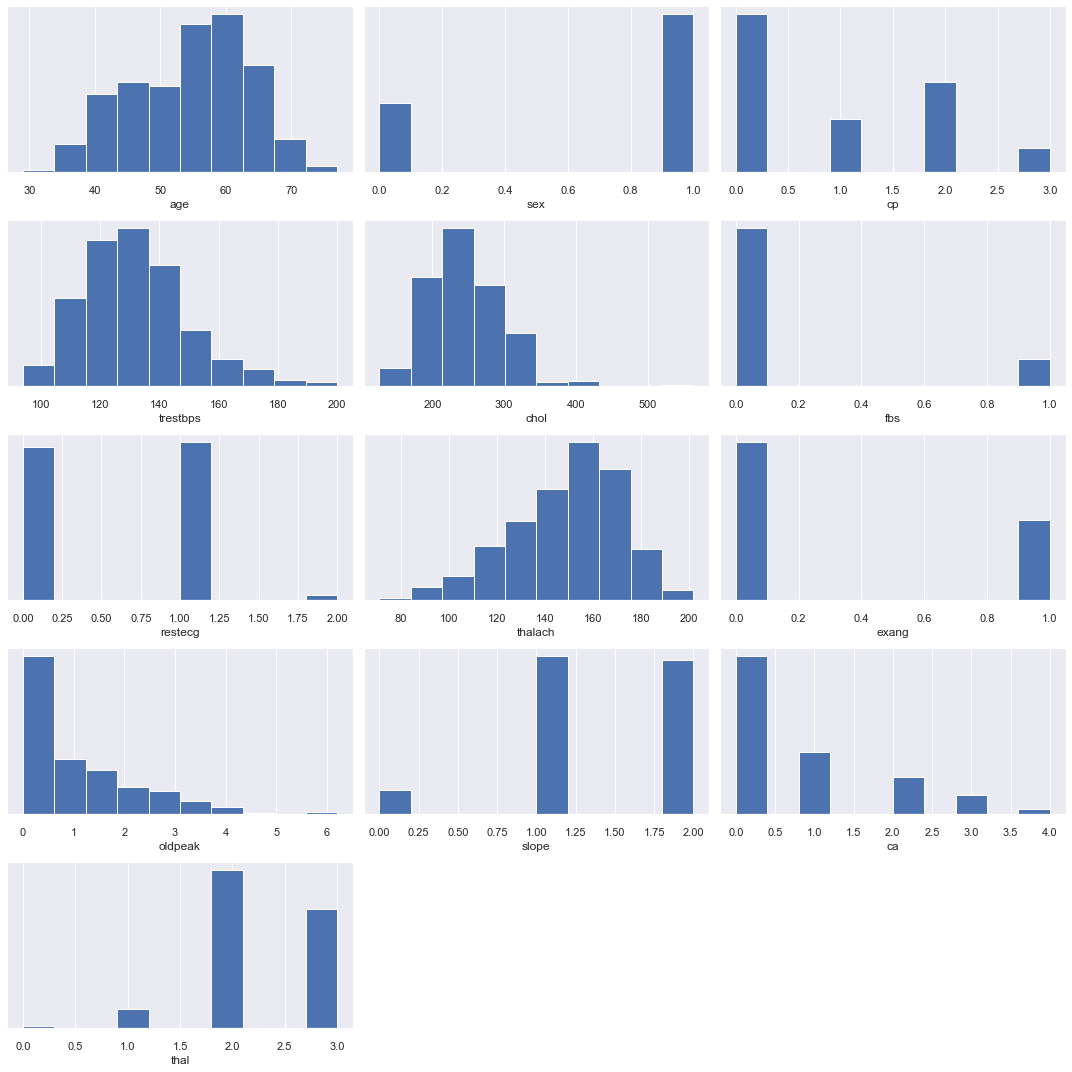

In [16]:
plt.figure(figsize=(15, 15))

for count, column in enumerate(df_dist.columns):
    plt.subplot(5, 3, count+1)
    plt.hist(df_dist[column])
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

Through this multi-histogram visualization, we can analyze the distribution of every column in the dataset, such as the range, maximum and minimum value, and also the trend of the data.

### Boxplot

After that, we can use a box plot to analyze the range and distribution of every column in our dataset based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

Below is the visualization of boxplot for every feature.

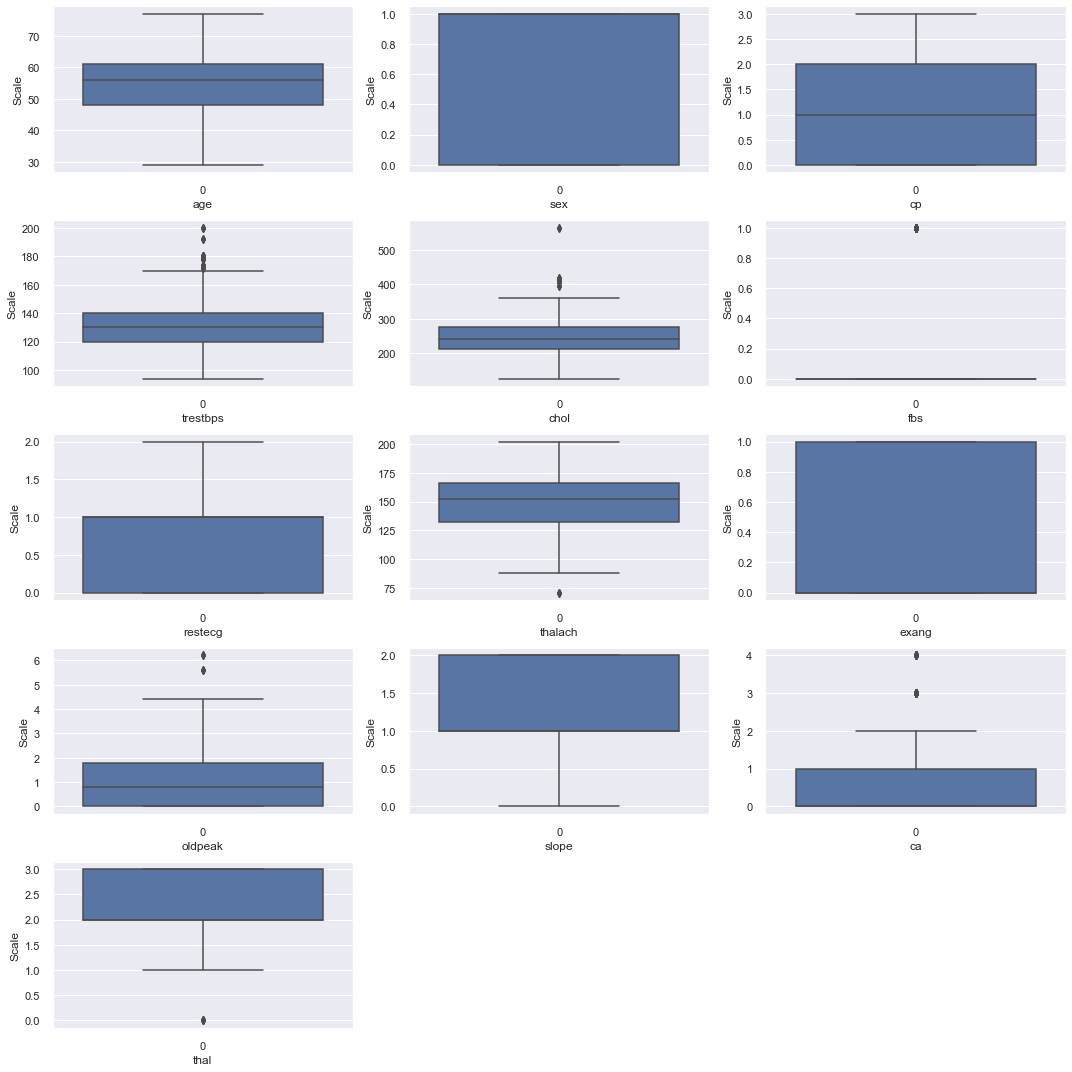

In [17]:
plt.figure(figsize=(15, 15))

for count, column in enumerate(df_dist.columns):
    plt.subplot(5, 3, count+1)
    sns.boxplot(data=df_dist[column])
    plt.xlabel(column)
    plt.ylabel("Scale")
    plt.tight_layout()

plt.show()

The dataset has very little outliers as seen from the graph.

### Heat Map

We will use a heatmap to visualize the features that has the highest correlation with the target variable.

The following code aims to:
1. Find every column's correlation with the target variable.
2. Give the columns a name.
3. Drop irrelevant row, which is the target variable itself.
4. Sort Values in descending order.
5. Reset Index, and drop the extra column created.

In [18]:
corr = df.corrwith(df["target"]).reset_index()
corr.columns = ["Feature", "Corr Value"]
corr.drop(13, inplace=True)
corr.sort_values(by="Corr Value", ascending=False, inplace=True)
corr.reset_index(inplace=True)
corr.drop("index", axis=1, inplace=True)

In order to visualize this in a heatmap, we need to set the index of the dataframe as the features. We can then rename the columns for better understanding.

In [19]:
corr.set_index("Feature", inplace=True)
corr.columns = ["Diagnosis"]

In [20]:
corr

,Diagnosis
Feature,
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


Because the features all have a low correlation, which is less than 0.5, we shouldn't drop any features at first, as every feature matters in this case.

**Visualize in a HeatMap**

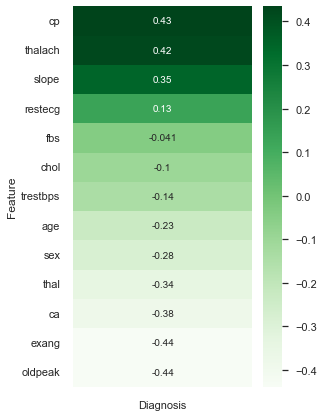

In [21]:
plt.figure(figsize=(4, 7))
sns.heatmap(data=corr, cmap="Greens", annot=True)
plt.show()

### Scatter Plot

We can try to see the relationship/correlation for every feature with the target variable.

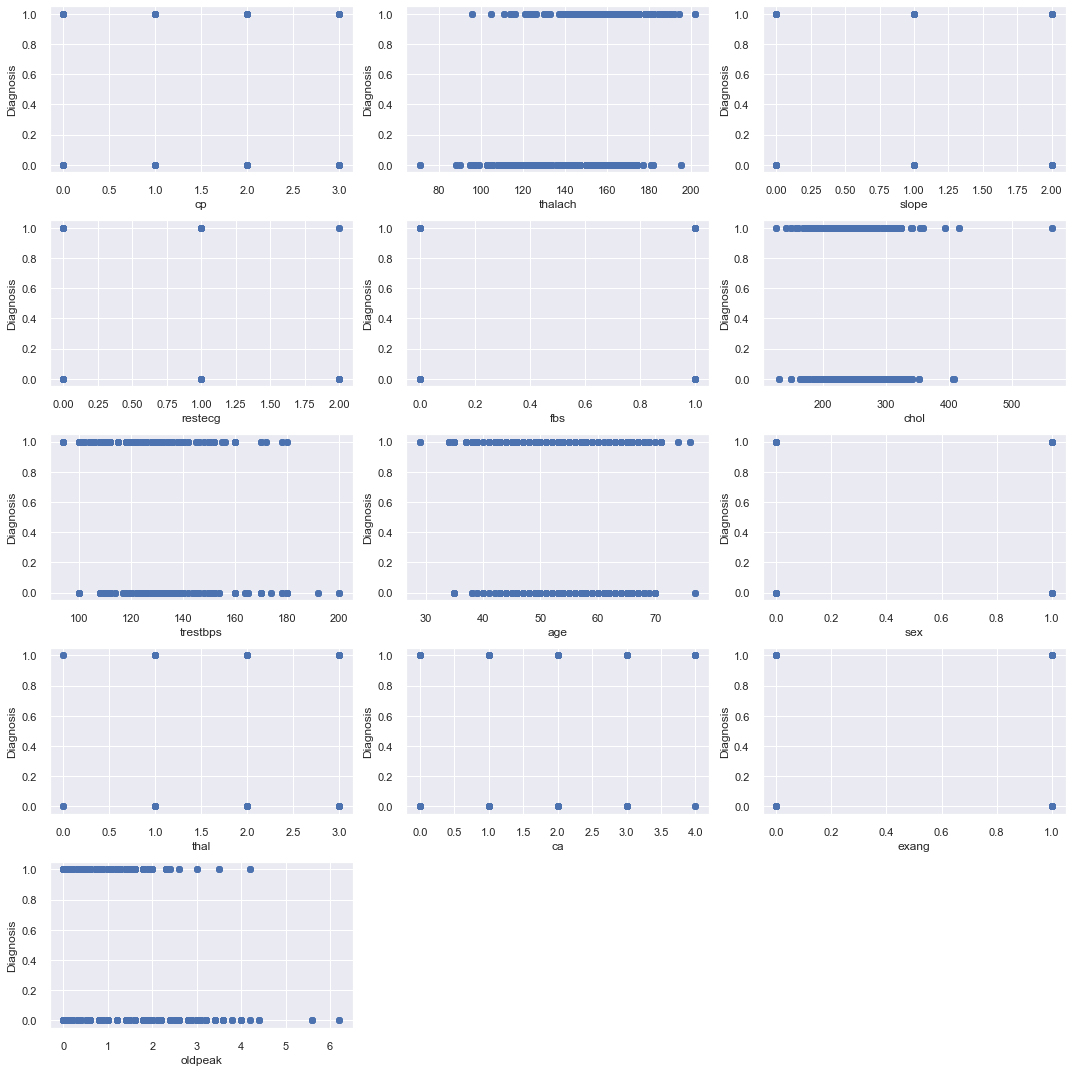

In [22]:
plt.figure(figsize=(15, 15))

for count, column in enumerate(corr.index):
    plt.subplot(5, 3, count+1)
    plt.scatter(x=df[column], y=df["target"])
    plt.xlabel(column)
    plt.ylabel("Diagnosis")
    plt.tight_layout()

plt.show()

## Data Pre-Processing

This is where we will conduct:
1. Preparing our Features and Labels
2. Splitting them into Training and Test Set.
3. Feature Scaling

__Preparing our Features and Labels__

In [23]:
features = df[corr.index]
label = df["target"]

**Splitting them into Training and Test Set.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, label,
                                     test_size = 0.25, random_state = 22)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 13)
(257, 13)
(768,)
(257,)


**Feature Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Data Modeling

Over here, we want to compare which approach to solving this problem is better, Machine learning or Deep Learning..

### ML Approach

For ML Approach, I'll be using Random Forest Classifier, so import the module from sklearn library.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(
    random_state=22
)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=22)

In [31]:
rfc.score(x_test, y_test)

1.0

We can see here that our Machine Learning model performs very good, giving us an accuracy of 100 %.

### DL Approach

We will be using the sequential model for training a neural network in Deep Learning.

Import these libaries beforehand.

In [32]:
from keras.models import Sequential
from keras.layers import Dense

Initialize your model, then start creating Dense Layers. Over here I am using:
- 1 Input Layer
- 2 Hidden Layers
- 1 Output Layer

For the hyperparameters, this link can serve as a reference.

https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af


In [33]:
ann = Sequential()
ann.add(Dense(units=8, activation="relu", input_dim=13))
ann.add(Dense(units=4, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy", 
            metrics=["accuracy"])

I am using sigmoid activation function and binary crossentropy loss function because we are classifying binary labels.

In [34]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


Then, we can experiment using 2 different batch sizes, which are 16 and 128.

And over here I am using 100 as the epoch, because there aren't any minimal results with epoch 20.

In [35]:
history_16 = ann.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
48/48 [==============================] - 7s 3ms/step - loss: 0.8160 - accuracy: 0.4974
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.5104
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5742
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.5964
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6367
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.6992
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7591
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7930
Epoch 9/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.8203
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8164
Epoch 11/

Now for batch size 128.

In [36]:
ann2 = Sequential()
ann2.add(Dense(units=8, activation="relu", input_dim=13))
ann2.add(Dense(units=4, activation="relu"))
ann2.add(Dense(units=1, activation="sigmoid"))
ann2.compile(optimizer="adam", loss="binary_crossentropy", 
            metrics=["accuracy"])

In [37]:
history_128 = ann2.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.7362 - accuracy: 0.4935
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7142 - accuracy: 0.5013
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5013
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.5117
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.5208
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.5365
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.5508
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.5560
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.5625
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.5781
Epoch 11/100
6/6 [===========

In [38]:
print(history_16.history.keys())

dict_keys(['loss', 'accuracy'])


We can plot the 2 ann models through their accuracy history, to compare the learning curve.

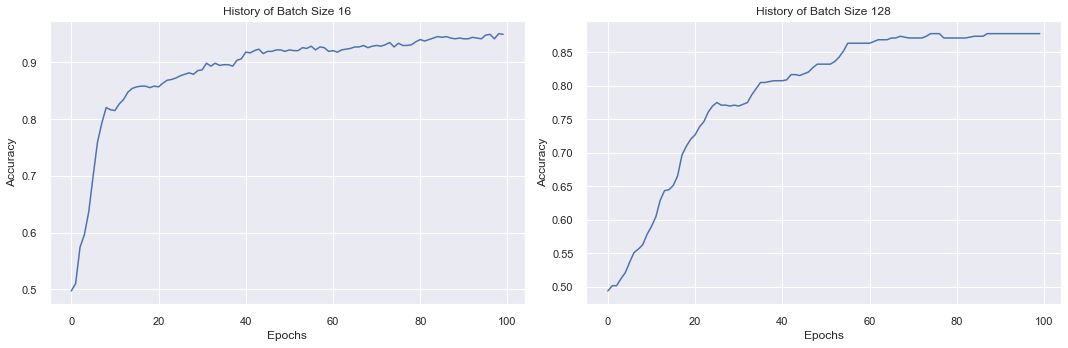

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history_16.history['accuracy'])
plt.title("History of Batch Size 16")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(history_128.history['accuracy'])
plt.title("History of Batch Size 128")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

plt.show()

We can see that the ann model with batch size 16 has a faster learning rate, it has reached 0.8 accuracy below epoch 10, whereas the ann model with batch size 128 needs around 35 epochs to reach 0.8 accuracy. Moreover, the peak accuracy of the batch size 16 ann model is high, can reach 95 %, the ann model with batch size 128 can only reach 88 % of accuracy. 

This is due to our dataset being very balanced, so it's better to have lower batch size. On the other hand, For unbalanced datasets have larger value like 128.

Regarding the epoch analysis, we can conclude that as the number of epochs increase, the accuracy of our model also increases, this is because our model learns and evaluates more when there are more epochs.

We will use Batch size 16 then for data evaluation.

## Data Evaluation

Import numpy for some calculations.

In [40]:
import numpy as np

We can use the EVALUATE method, to get the accuracy of our ann model prediction for test data.

In [41]:
loss, acc = ann.evaluate(x_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 0.2092 - accuracy: 0.9183


In [42]:
print(np.round(acc*100, 2), "%")

91.83 %


We can also create a confusion matrix so we can analyze further the errors of our model.

In [43]:
from sklearn.metrics import confusion_matrix

To compare y_pred with y_true/y_test, we need to map the values of y_pred, which are originally values from the sigmoid function. We can filter sigmoid values greater or equal to 0.5 as being True or 1, and the others as False or 0.

In [44]:
y_pred = ann.predict(x_test)
y_pred = y_pred >= 0.5

9/9 [==============================] - 0s 3ms/step


In [45]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

__Creating Confusion Matrix__

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,  14],
       [  7, 126]], dtype=int64)

Code for checking whether our confusion matrix is correct or not.

If accuracy is the same as above, it means that the confusion matrix is correct.

In [47]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(np.round(accuracy*100, 2), "%")

91.83 %


To present this confusion matrix in a heatmap, we can use the following code:

In [48]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

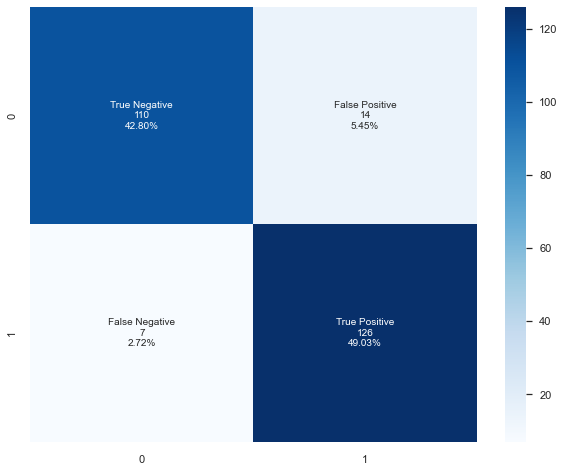

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()